In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")


In [5]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

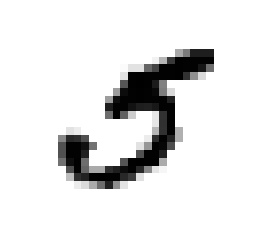

In [9]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

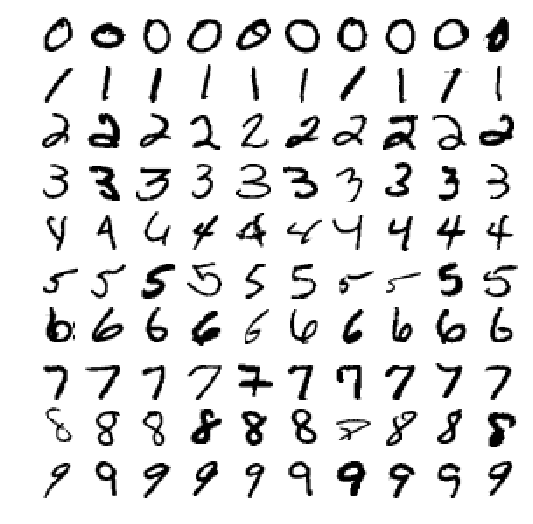

In [19]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

In [11]:
y[36000]

5.0

In [12]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [13]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [22]:
y_train_5 = (y_train==5)
y_test_5 = (y_test ==5)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [24]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95965
0.96405
0.94745


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([ 0.95965,  0.96405,  0.94745])

In [30]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype= bool)

In [32]:
never_5_clf= Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5,cv = 3,scoring = 'accuracy')

array([ 0.90645,  0.91135,  0.91115])

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53935,   644],
       [ 1933,  3488]])

In [38]:
y_train_perfect_predictions = y_train_5

In [39]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [41]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.84414327202323325

In [42]:
recall_score(y_train_5, y_train_pred)

0.64342372256041325

In [44]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.73024180885585677

In [45]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 167492.23583263])

In [47]:
threshold = 0

y_some_digit_pred=(y_scores>threshold)

In [48]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False], dtype=bool)

In [49]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method ='decision_function')

In [56]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = "Precision")
    plt.plot(thresholds, recalls[:-1], 'g--', label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc= 'upper left')
    plt.ylim([0,1])

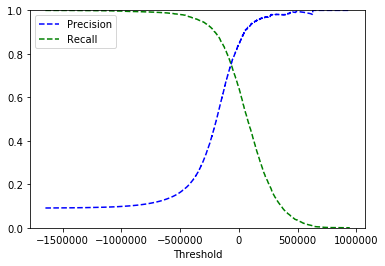

In [64]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [65]:
y_train_pred_90 = (y_scores>70000)

In [66]:
precision_score(y_train_5, y_train_pred_90)

0.91488651535380505

In [67]:
recall_score(y_train_5, y_train_pred_90)

0.50562626821619627

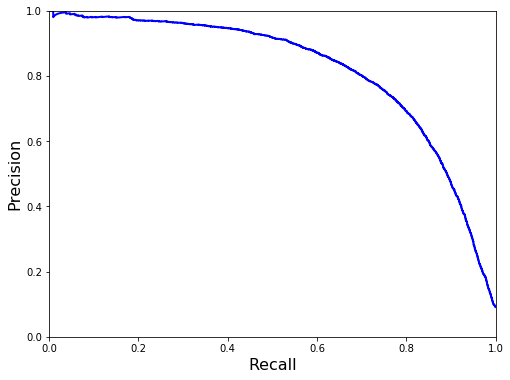

In [69]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.95693312881163228

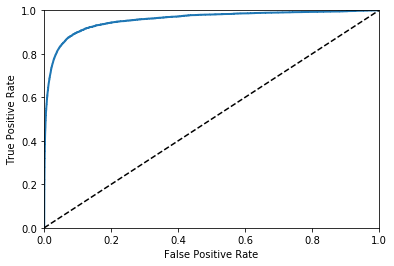

In [71]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3,
                                   method = 'predict_proba')



In [74]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

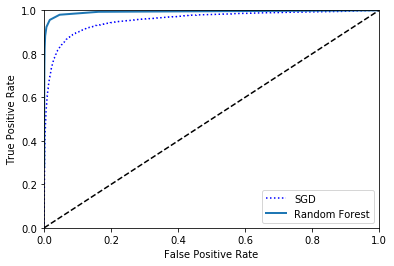

In [76]:
plt.plot(fpr,tpr,"b:", label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc ="lower right")
plt.show()

In [79]:
roc_auc_score(y_train_5,y_scores_forest)

0.99317140075068555

In [80]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [82]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-143786.16110414, -346934.10837879, -301429.51987363,
        -300187.52635789, -318401.85005237,  167492.23583263,
        -817346.23238151, -318132.18149936, -501790.58042391,
        -778618.44984833]])

In [84]:
np.argmax(some_digit_scores)

5

In [85]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [88]:
sgd_clf.classes_[5]

5.0

In [89]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [90]:
len(ovo_clf.estimators_)

45

In [91]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [92]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.2,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ]])

In [93]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

array([ 0.87522496,  0.84844242,  0.83792569])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([ 0.91011798,  0.9079454 ,  0.91043657])

In [96]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5735,    3,   17,   11,   11,   48,   48,   10,   37,    3],
       [   1, 6491,   40,   25,    5,   39,    7,   13,  107,   14],
       [  52,   40, 5319,  100,   82,   30,   91,   58,  168,   18],
       [  51,   42,  136, 5327,    3,  241,   35,   57,  140,   99],
       [  19,   25,   37,    8, 5364,    9,   53,   35,   78,  214],
       [  78,   48,   29,  181,   73, 4599,  114,   33,  166,  100],
       [  31,   22,   53,    3,   41,   93, 5621,    9,   44,    1],
       [  24,   21,   68,   32,   58,   11,    3, 5826,   16,  206],
       [  57,  159,   66,  147,   12,  155,   61,   28, 5014,  152],
       [  41,   33,   30,   87,  158,   32,    2,  219,   73, 5274]])

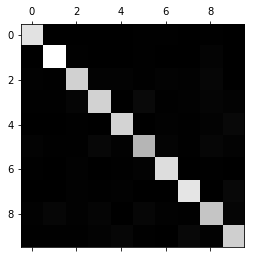

In [97]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [98]:
row_sums = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx= conf_mx/row_sums

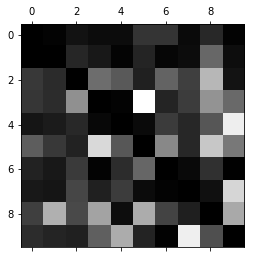

In [99]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [100]:
cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

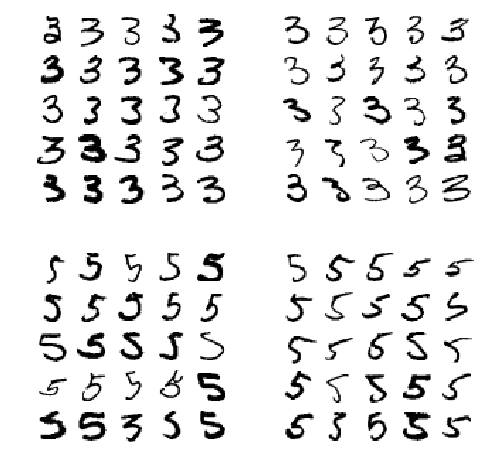

In [103]:
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [104]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_knn_pred, average = 'macro')


In [ ]:
noise = rnd.randint(0,100, (len(X_train), 784))
noise_test = rnd.randint(0,100,(len(X_test),784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)